In [1]:
# load the package
using HomotopyContinuation
using Plots
# using Distributions
using Pandas
using LinearAlgebra

## Allisons problem

In [2]:
b = [2; 2.5; 3]
w = [1.3; 1.5; 1.2]
a1e = 0.2

0.2

In [8]:
@var x[1:3], a[1:3]
@var l[1:3];
h1 = 0.1x[1]*a[2]+0.8x[1]*a[3]+b[1]-a[1]
h2 = x[2]*a[3]+b[2]-a[2]
h3 = 0.1x[3]*a[1]+0.8x[3]*a[2]+b[3]-a[3]
f = (a[1]-a1e)^2+([x[1]^2 x[2]^2 x[3]^2]*w.^2)[1];
vars = [x; a]
h = [h1, h2, h3]

3-element Vector{Expression}:
 2.0 - a₁ + 0.1*a₂*x₁ + 0.8*a₃*x₁
                 2.5 - a₂ + a₃*x₂
 3.0 - a₃ + 0.1*a₁*x₃ + 0.8*a₂*x₃

In [56]:
h

3-element Vector{Expression}:
 2.0 - a₁ + 0.1*a₂*x₁ + 0.8*a₃*x₁
                 2.5 - a₂ + a₃*x₂
 3.0 - a₃ + 0.1*a₁*x₃ + 0.8*a₂*x₃

In [10]:
J = differentiate(h, vars);
dfdx = differentiate(f, vars);

In [11]:
kkt = [dfdx - J'*l; h];

In [12]:
Opt = System(kkt, variables = [vars; l]);

In [13]:
res = solve(Opt)

Tracking 68 paths... 100%|██████████████████████████████| Time: 0:00:08
  # paths tracked:                  68
  # non-singular solutions (real):  52 (6)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         52 (6)


Result with 52 solutions
• 68 paths tracked
• 52 non-singular solutions (6 real)
• random_seed: 0xa9db2224
• start_system: :polyhedral


In [45]:
real_sols = real_solutions(res)
#real_sols = permutedims(hcat(real_solutions(res)...))

6-element Vector{Vector{Float64}}:
 [-103.43463884546874, -50.18445693671601, -21.532808574867246, 41.01766328850924, -4.96168637778993, 0.14868520719870146, 926.8030375592098, -1518.8468339922006, -468.3264427071819]
 [0.3739904475761244, -0.42427126829027106, -1.5637825851059706, 1.8424971295626027, 2.8758661828251446, -0.8859100554694891, -3.0015753247886927, 2.1550954247769836, -1.8123934684776306]
 [-199.94735230111021, -14.113429764528798, -0.15654761814249213, 318.72226341913324, -39.840274633097415, 2.9999989612383935, 426.64771406011283, -21.170151977040224, -67946.88118028022]
 [-0.2562781539152825, -7.999987102963897, -0.15727589809371736, 1.9360641484503358, 3238.2632022919174, -404.47105234621023, -3.472125547220079, 0.08900498998510058, -0.00017483165731362274]
 [-86.26527444524132, -110.15227359082984, -68.58498880914202, 2.8054005227348853, -0.29646107438837604, 0.0253872297250629, 31230.34700607084, -19524.983092951712, -4554.284887913078]
 [-0.5071253944274235, 0.0474

In [46]:
DataFrame(real_sols)

0           1          2  ...             6             7             8
0 -103.434639  -50.184457 -21.532809  ...    926.803038  -1518.846834   -468.326443
1    0.373990   -0.424271  -1.563783  ...     -3.001575      2.155095     -1.812393
2 -199.947352  -14.113430  -0.156548  ...    426.647714    -21.170152 -67946.881180
3   -0.256278   -7.999987  -0.157276  ...     -3.472126      0.089005     -0.000175
4  -86.265274 -110.152274 -68.584989  ...  31230.347006 -19524.983093  -4554.284888
5   -0.507125    0.047480   0.178855  ...     -0.575641      0.063036      0.236531

[6 rows x 9 columns]

In [54]:
minarg = (real_sols .|> x->evaluate(f, vars=>x[1:6])) |> argmin |> x->real_sols[x];

In [55]:
evaluate.(h, vars=>minarg[1:6])

3-element Vector{Float64}:
 -8.326672684688674e-17
  1.1102230246251565e-16
 -4.5102810375396984e-17

## Synthetic problem

In [54]:
@var x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14
@var λ[1:10];
h0=0.6*x_12*x_6 + 0.8*x_3*x_7 + 0.2*x_4 + 0.5;
h1=0.5*x_1*x_13*x_9 - 0.9*x_10*x_12 - 0.6*x_14 + 0.7;
h2=0.3*x_11*x_12 + 0.2*x_2*x_3*x_5 - 0.8*x_4*x_8 - 0.2;
h3=0.4*x_1*x_14*x_7 + 0.3*x_11*x_8 + 0.4;
h4=0.1*x_14*x_4 + 0.4*x_6*x_7 - 0.4;
h5=-0.3*x_14*x_6*x_7 + 0.1*x_3*x_5 - 0.4;
h6=0.8*x_13*x_9 - 0.2*x_14*x_3 - 0.5;
h7=0.2*x_2 - 0.8;
h8=0.8*x_0*x_5 - 0.3*x_12*x_2 - 0.7*x_9 - 0.1;
h9=-0.5*x_1*x_11*x_8 - 0.9;
vars=[x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14]
dfdx=[0, 0, 0, 0, 0, 0, 0, 2x_7-2, 0, 2x_9-2, 0, 0, 2x_12-2, 2x_13-2, 2x_14-2]
h=[h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, 2x_7-2, 2x_9-2, 2x_12-2, 2x_13-2, 2x_14-2];

In [22]:
#differentiate((x_8-1)^2+(x_10-1)^2+(x_12-1)^2, vars)

In [23]:
J = jacobian(System(h));

In [24]:
#Jval = round.(to_number.(subs(J.+eps(Float64), vars=>sol)),digits=15)
#b = evaluate(dfdx,vars=>sol);

In [25]:
# A2 = Jval[:,2:end].-Jval[:,1]*l0[1]
# l2 = nullspace(A2)*[1 1]' 
# A3 = A2[:,2:end].-A2[:,1]*l2[1]
# l3 = nullspace(A3) 
# A4 = A3[:,2:end].-A3[:,1]*l3[1]

In [26]:
#l0 = nullspace(Jval)*[1 1 1]' 

In [27]:
#[b + Jval'*λ; subs(h, vars=>sol)]

In [28]:
kkt = [dfdx + J'*λ; h];

In [29]:
Opt = System(kkt, variables = [vars; λ]);

In [55]:
Solv = System(h, variables = vars);

In [56]:
res = solve(Solv) #16 hours for 45 variables

Tracking 4 paths... 100%|███████████████████████████████| Time: 0:00:02
  # paths tracked:                  4
  # non-singular solutions (real):  4 (4)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         4 (4)


Result with 4 solutions
• 4 paths tracked
• 4 non-singular solutions (4 real)
• random_seed: 0xbd8d173e
• start_system: :polyhedral


In [57]:
real_sols = real_solutions(res);

In [58]:
real_sols

4-element Vector{Vector{Float64}}:
 [0.09036144578313254, 0.7649110640673518, 4.0, 1.5, -45.999999999999986, 27.66666666666666, 12.499999999999996, 1.0, 0.020905495836366465, 1.0, 0.5360617022596398, -112.56440748926092, 1.0, 1.0, 1.0]
 [0.09036144578313259, -1.7649110640673518, 4.0, 1.5, -45.99999999999998, 27.66666666666665, 12.499999999999995, 1.0, -0.00936954663328207, 1.0, -0.8693950355929732, -108.85066894631736, 1.0, 1.0, 1.0]
 [0.09036144578313257, 0.7649110640673518, 4.0, 1.5, -45.999999999999986, 27.666666666666657, 12.499999999999998, 1.0, -0.9176446262711492, 1.0, 0.5360617022596399, 2.5644074892609523, 1.0, 1.0, 1.0]
 [0.0903614457831326, -1.7649110640673518, 4.0, 1.5, -45.99999999999998, 27.66666666666665, 12.499999999999995, 1.0, -0.8873695838015002, 1.0, -0.8693950355929732, -1.1493310536826005, 1.0, 1.0, 1.0]

In [8]:
sol = real_sols[1];

In [255]:
sol

13-element Vector{Float64}:
  1.1584362139917694
  1.0
 -3.0000000000000004
  1.0
  1.0
  0.03703703703703702
 -1.3333333333333335
 -1.8662551440329218
 -0.07792207792207792
 -1.0
 -1.5538188277087035
 -4.277777777777778
 -2.851851851851851

In [28]:
sum((sol[2]-1)^2+(sol[4]-1)^2+(sol[5]-1)^2)

0.0

In [22]:
objs = [(idx, sum([elt[idx-9]^2 for idx in [11,12,13,14,15,17,18,19]]), valid[idx]) for (idx,elt) in enumerate(real_sols[0])]

1-element Vector{Vector{Float64}}:
 [1.1584362139917694, 1.0, -3.0000000000000004, 1.0, 1.0, 0.03703703703703702, -1.3333333333333335, -1.866255144032922, -0.07792207792207792, -1.0, -1.5538188277087035, -4.277777777777778, -2.851851851851851]

In [84]:
0.1/real_sols[5][4]*real_sols[5][11]

11.2783235488464

In [85]:
h_1 = subs(h9, [x_0]=>[real_sols[4][1]])

0.553148927062142 - 0.4*x_3*x_10

In [86]:
h_2 = subs(h5, [x_2,x_7,x_9]=>real_sols[4][[3,8,10]])

-3.6421064850287 + 2.63372578836768*x_3*x_10

In [63]:
h11+h12

-0.0928781489093999 + 2.5629899*x_3*x_10

In [61]:
C1 = System(h, variables = vars,parameters = u);

In [95]:
res = solve(C1, target_parameters =[0.3,0.1,0.1]) 

Result with 30 solutions
• 30 paths tracked
• 30 non-singular solutions (8 real)
• random_seed: 0xfa7c2987
• start_system: :polyhedral


In [91]:
real_sols = real_solutions(res);

In [92]:
DataFrame(real_sols)

0           1          2         3   ...        9         10   11   12
0  -0.000127  493.850296  10.559465 -0.468715  ...  0.365245  3.733541  0.1  0.1
1   0.063350  -30.572741  10.474827 -0.470612  ...  0.367355  3.752217  0.1  0.1
2  18.096732   -0.008478   2.895012 -0.712510  ...  0.849895  8.805746  0.1  0.1
3 -19.603931    0.100811   5.216189 -1.068495  ...  0.140521 -2.948991  0.1  0.1

[4 rows x 13 columns]

## Optimization

In [5]:
J = differentiate(h, vars);

In [6]:
kkt = [dfdx - J'*λ; h];

In [7]:
Opt = System(kkt, variables = [vars; λ]);

In [8]:
opt = solve(Opt)

Tracking 105 paths... 100%|█████████████████████████████| Time: 0:00:19
  # paths tracked:                  105
  # non-singular solutions (real):  77 (11)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         77 (11)


Result with 77 solutions
• 105 paths tracked
• 77 non-singular solutions (11 real)
• random_seed: 0xe2abfb2a
• start_system: :polyhedral


In [80]:
real_sols = real_solutions(opt);

In [93]:
real_sols[8][14:end]

10-element Array{Float64,1}:
 -8.070065164468728
  0.0
 -0.6702017313781344
 10.56294540001432
 -7.3095397502722275
 -1.028448275698785
 -1.7702757088371428
 -4.385502221807738
  8.026313043233805e-32
 29.89201695117508

In [82]:
xs = map(p -> p[1:13], real_sols);

In [84]:
xs;

In [88]:
valid = [all(abs.(elt) .> 0.01) for elt in xs];

In [91]:
objs = [(idx, sum([elt[idx-9]^2 for idx in [11,12,13,14,15,17,18,19]]), valid[idx]) for (idx,elt) in enumerate(xs)]

11-element Array{Tuple{Int64,Float64,Bool},1}:
 (1, 160.41630040592673, 1)
 (2, 54.76560267575184, 1)
 (3, 59.10746811184429, 1)
 (4, 60.70890042689245, 1)
 (5, 54.666471431212024, 1)
 (6, 44.16618337054458, 1)
 (7, 2.9906175743414955e6, 0)
 (8, 37.505405294327296, 1)
 (9, 159.79450875202195, 1)
 (10, 39.44023437378726, 1)
 (11, 43.89506639058234, 1)

In [92]:
xs[8]

13-element Array{Float64,1}:
  -1.5000000000000002
  -1.5861574138526022
  -2.9039010778487695
  -1.557109343272545
  -0.06304544500227817
   2.1641611497053543
 -33.96860313514649
  -1.1243308506045717
   4.1323721705044045
   1.050757416704636
   2.5
   0.7463699802115709
  -8.562193271133395

In [41]:
objs = [elt[9]^2 for elt in xs if elt[9]^2<=1];

In [84]:
res = hcat([elt[[3,8,10]] for elt in xs if elt[9]^2<=1]...)

3×41 Array{Float64,2}:
  1.08771   -2.77318   -0.145443  …  0.482864  -2.42381   -0.543099
 -0.63979   -2.05364   -0.607108     1.34852   -2.17316   -0.695442
  0.960985   0.688615   0.842597     0.707536   0.912763   0.859671

In [87]:
dist, idx = findmin(objs)

(4.787341467137889e-5, 41)

In [88]:
res[:, idx]

3-element Array{Float64,1}:
 -0.5430990106328428
 -0.6954415160549715
  0.8596714170233678

In [85]:
[minimum.(eachrow(res)) maximum.(eachrow(res))]

3×2 Array{Float64,2}:
 -2.77826  1.08771
 -8.4735   1.43142
 -1.23403  1.16269

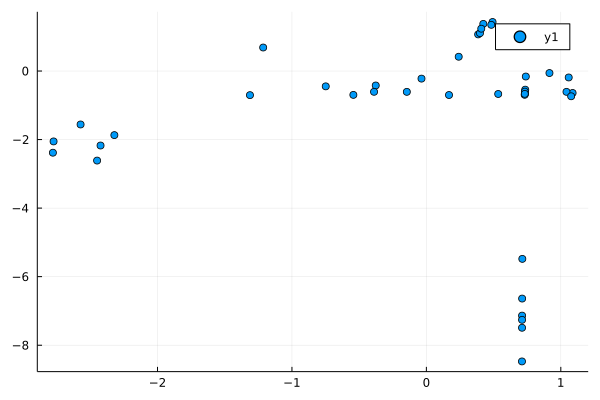

In [86]:
scatter(res[1,:], res[2,:])

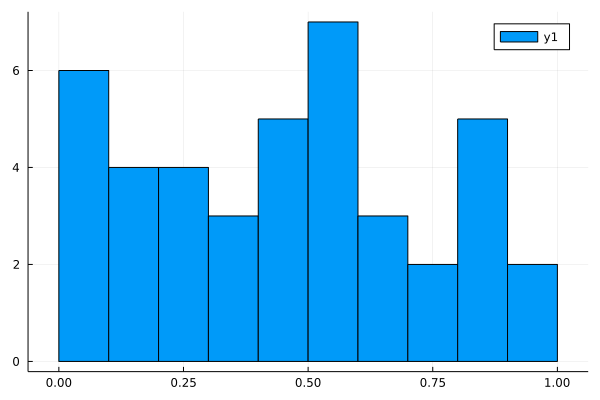

In [43]:
histogram(objs, nbins=10)

In [178]:
dfdx2=[0, 0, 0, 0, 0, 0, x_16, 0, 0, 0, 0, x_21, 0]
kkt2 = [dfdx2 + J'*λ; h];

In [179]:
C2 = System(kkt2, variables = [vars;λ]);

In [180]:
res = solve(C2) 

Tracking 439 paths... 100%|█████████████████████████████| Time: 0:00:12
  # paths tracked:                  439
  # non-singular solutions (real):  173 (39)
  # singular endpoints (real):      56 (0)
  # total solutions (real):         229 (39)


Result with 229 solutions
• 439 paths tracked
• 173 non-singular solutions (39 real)
• 56 singular solutions (0 real)
• random_seed: 0xbee6112d
• start_system: :polyhedral
• multiplicity table of singular solutions:
╭───────┬───────┬────────┬────────────╮
│ mult. │ total │ # real │ # non-real │
├───────┼───────┼────────┼────────────┤
│   1   │  56   │   0    │     56     │
╰───────┴───────┴────────┴────────────╯


In [181]:
real_sols = real_solutions(res);

In [182]:
xs = map(p -> p[1:13], real_sols);
xsA = hcat(xs...)
objs = xsA[7,:].^2+xsA[12,:].^2

39-element Array{Float64,1}:
      3.9798409406126463e8
   1477.972979487994
 340324.0457878663
 301175.34191074246
      1.0016789074413521
 995960.8625076213
      0.0039051512233756807
   6456.586059233902
    927.0238111397424
      5.822119577871414e9
      8.812508691929475e8
     44.614786171692444
    957.4075748176444
      ⋮
      1.2647285915415956
      2.592165752192883e7
   8577.062992018235
      1.6678075485219068
      5.006444008461111
      6.129213854597762
    357.63354154388736
     66.55817634126215
      3.7845127497033504
 116408.55872691056
     50.08551769421408
   9238.691256075599

In [184]:
res = hcat([elt[[3,8,10]] for elt in xs if norm(elt)<=100]...)

3×16 Array{Float64,2}:
 0.377306   0.443338   0.898804  -2.42246  …   0.470309   0.73501   3.87402
 1.10114   -0.845152  -0.509445  -2.67582     -0.535965  -0.520315  1.94902
 0.408425   1.12216    0.742456   1.16716      0.449941   0.730407  0.868881

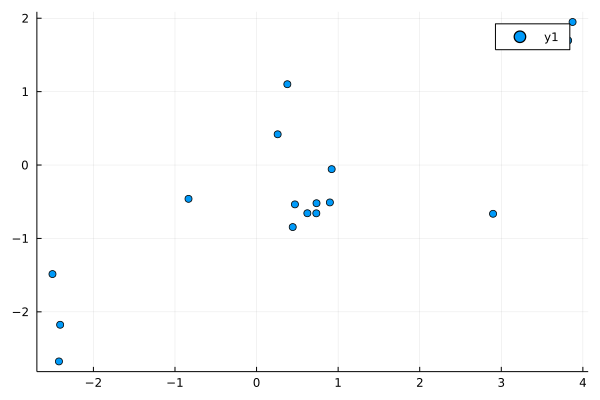

In [185]:
scatter(res[1,:], res[2,:])

In [186]:
dist, idx = findmin(objs)

(0.0039051512233756807, 7)

In [187]:
resall = hcat([elt[[3,8,10]] for elt in xs]...)
xsA[:, idx]

13-element Array{Float64,1}:
  0.7499999999999999
  1.889313115646144
  0.898804098120615
 -0.7908051221220493
  1.3820918790925956
  1.2849924684816705
 -0.062169954668825904
 -0.5094445235767231
 -0.8285562133874456
  0.7424557855321242
 -0.25
 -0.0063283457437005594
 -0.42723987060917573

In [188]:
xs[idx][[7,12]]

2-element Array{Float64,1}:
 -0.062169954668825904
 -0.0063283457437005594

## Compare to openmdao results

In [199]:
C3 = System([h; x_22-0.6; x_16; x_21], variables = vars);

In [200]:
res3 = solve(C3) 

Result with 9 solutions
• 9 paths tracked
• 9 non-singular solutions (5 real)
• random_seed: 0xede1a667
• start_system: :polyhedral


In [201]:
real_sols3 = real_solutions(res3);

In [202]:
real_sols3[2]

13-element Array{Float64,1}:
  0.7499999999999999
  1.04205527917924
  1.273821307101235
  0.2808073763760084
  1.230490800377816
 -0.029607126230005523
  0.0
 -0.44989774103806396
 -1.0878834207394095
  0.5373437710303754
 -0.25
  0.0
  0.6